In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [4]:
df= pd.read_csv('hand_landmarks_data.csv')
df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


In [5]:
df_copy = df.copy()

In [6]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

In [7]:
df_copy.isna

<bound method DataFrame.isna of                x1          y1            z1          x2          y2        z2  \
0      262.669968  257.304901 -3.649205e-07  257.417542  247.109055  0.004224   
1       83.351778  346.059113 -2.345265e-07   81.925037  328.562347 -0.011102   
2      187.756977  260.235492 -2.417307e-07  195.460579  241.506035 -0.000184   
3      114.976696  331.594238 -1.233261e-07  114.503494  320.549957 -0.002824   
4      188.795288  141.727867 -1.622995e-07  188.520905  127.947464 -0.002884   
...           ...         ...           ...         ...         ...       ...   
25670  259.135620  277.542236  4.323656e-07  271.098221  257.333374  0.007132   
25671   90.063995  256.181732  3.808555e-07   77.302231  237.829132  0.003778   
25672  236.724518  251.496756  5.912488e-07  254.918358  232.369956  0.001354   
25673  119.466957  309.842529  4.319564e-07  111.772064  291.310333  0.006174   
25674  484.605038  146.067902  1.448425e-07  496.102267  134.851696  0.001697

In [9]:
columns_to_drop = df_copy.columns[2::3]
df_copy = df_copy.drop(columns=columns_to_drop)

In [10]:
df_shuffled = df_copy.sample(frac=1, random_state=42).reset_index(drop=True)
X = df_shuffled.drop(df_shuffled.columns[-1], axis=1)
y = df_shuffled[df_shuffled.columns[-1]]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify= y)

In [12]:
def wrist_relative_scaling(landmarks):
    landmarks = np.array(landmarks).copy()
    
    if landmarks.ndim == 2: 
        landmarks = landmarks.reshape(-1, 21, 2)
    elif landmarks.ndim == 3:  
        pass
    else:
        raise ValueError("Input must be 2D (N,42) or 3D (N,21,2)")
    
    wrist = landmarks[:, 0, :] 
    middle_tip = landmarks[:, 12, :]
    
    # Compute scale
    scale = np.linalg.norm(middle_tip - wrist, axis=1, keepdims=True)
    scale[scale == 0] = 1  # Avoid division by zero
    
    # Normalize landmarks: (landmarks - wrist) / scale
    landmarks = (landmarks - wrist[:, np.newaxis, :]) / scale[:, np.newaxis, :]
    
    # Flatten
    return landmarks.reshape(landmarks.shape[0], -1)

In [13]:
from sklearn.preprocessing import LabelEncoder

# Print original shapes
print("X_train original shape:", X_train.shape)
print("X_test original shape:", X_test.shape)

# Apply scaling
X_scaled = wrist_relative_scaling(X_train)
X_test_scaled = wrist_relative_scaling(X_test)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Print shape to verify
print("X_scaled shape:", X_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_encoded shape:", y_encoded.shape)
print("y_test_encoded shape:", y_test_encoded.shape)

X_train original shape: (20540, 42)
X_test original shape: (5135, 42)
X_scaled shape: (20540, 42)
X_test_scaled shape: (5135, 42)
y_encoded shape: (20540,)
y_test_encoded shape: (5135,)


RFC model training and testing:

In [14]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=50,random_state=42)
RFC.fit(X_scaled,y_encoded)
RFC_pred = RFC.predict(X_test_scaled)

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

RFC_pred = RFC.predict(X_test_scaled)

RFC_accuracy = accuracy_score(y_test_encoded, RFC_pred)
RFC_precision = precision_score(y_test_encoded, RFC_pred, average='weighted') 
RFC_recall = recall_score(y_test_encoded, RFC_pred, average='weighted')
RFC_f1 = f1_score(y_test_encoded, RFC_pred, average='weighted')

print(
    f"""RFC Metrics: "
    "Accuracy = {RFC_accuracy}, 
    "Precision = {RFC_precision}, 
    "Recall = {RFC_recall}, 
    "F1 = {RFC_f1}"""
)

RFC Metrics: "
    "Accuracy = 0.972541382667965, 
    "Precision = 0.972923203920944, 
    "Recall = 0.972541382667965, 
    "F1 = 0.9726077241179185


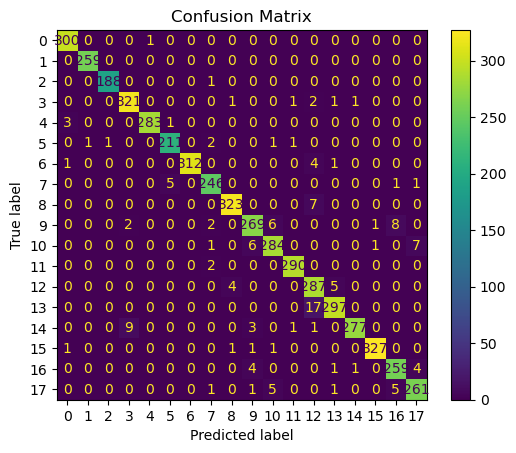

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test_encoded, RFC_pred)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from joblib import dump, load
dump(RFC, 'random_forest_model.joblib')

SVM model training and testing:

In [17]:
from sklearn import svm
SVM = svm.SVC(kernel='linear')
SVM.fit(X_scaled, y_encoded)

SVC(kernel='linear')

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

SVM_pred = SVM.predict(X_test_scaled)

SVM_accuracy = accuracy_score(y_test_encoded, SVM_pred)
SVM_precision = precision_score(y_test_encoded, SVM_pred, average='weighted')  
SVM_recall = recall_score(y_test_encoded, SVM_pred, average='weighted')
SVM_f1 = f1_score(y_test_encoded, SVM_pred, average='weighted')

print(
    f"""SVM Metrics: "
    "Accuracy = {RFC_accuracy}, 
    "Precision = {RFC_precision}, 
    "Recall = {RFC_recall}, 
    "F1 = {RFC_f1}"""
)

SVM Metrics: "
    "Accuracy = 0.972541382667965, 
    "Precision = 0.972923203920944, 
    "Recall = 0.972541382667965, 
    "F1 = 0.9726077241179185


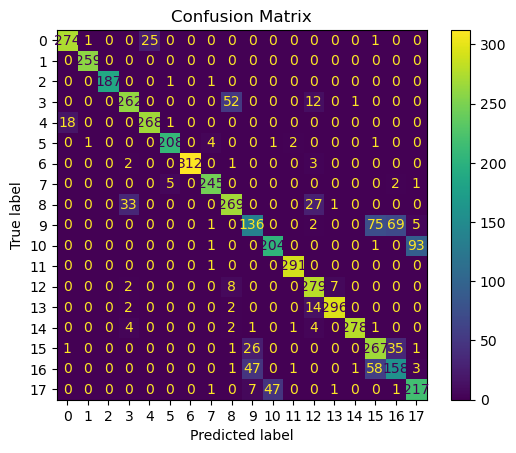

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test_encoded, SVM_pred)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from joblib import dump, load
dump(SVM, 'SVM_model.joblib')

XGBoost model training and testing:


In [20]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Define  XGBoost model with tuned hyperparameters
XGB = xgb.XGBClassifier(
    max_depth=7,
    learning_rate=0.04980282722383345,
    n_estimators=730,
    min_child_weight=5,
    gamma=0.15019269405797428,
    subsample=0.9314905002229553,
    colsample_bytree=0.9082541117160634,
    reg_alpha=0.8225655601606828,
    reg_lambda=8.146896526387623,
    objective='multi:softmax',
    num_class=len(set(y_encoded)),
)

# Train the model
XGB.fit(X_scaled, y_encoded, eval_set=[(X_test_scaled, y_test_encoded)])


[0]	validation_0-mlogloss:2.56717
[1]	validation_0-mlogloss:2.33264
[2]	validation_0-mlogloss:2.14436
[3]	validation_0-mlogloss:1.99157
[4]	validation_0-mlogloss:1.85976
[5]	validation_0-mlogloss:1.74544
[6]	validation_0-mlogloss:1.64342
[7]	validation_0-mlogloss:1.55308
[8]	validation_0-mlogloss:1.47098
[9]	validation_0-mlogloss:1.39688
[10]	validation_0-mlogloss:1.32924
[11]	validation_0-mlogloss:1.26604
[12]	validation_0-mlogloss:1.20840
[13]	validation_0-mlogloss:1.15473
[14]	validation_0-mlogloss:1.10543
[15]	validation_0-mlogloss:1.05824
[16]	validation_0-mlogloss:1.01398
[17]	validation_0-mlogloss:0.97249
[18]	validation_0-mlogloss:0.93344
[19]	validation_0-mlogloss:0.89702
[20]	validation_0-mlogloss:0.86247
[21]	validation_0-mlogloss:0.82991
[22]	validation_0-mlogloss:0.79960
[23]	validation_0-mlogloss:0.77087
[24]	validation_0-mlogloss:0.74295
[25]	validation_0-mlogloss:0.71610
[26]	validation_0-mlogloss:0.69118
[27]	validation_0-mlogloss:0.66685
[28]	validation_0-mlogloss:0.6

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9082541117160634, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=0.15019269405797428, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.04980282722383345,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=730, n_jobs=None, num_class=18, ...)

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

XGB_pred = XGB.predict(X_test_scaled)

accuracy = accuracy_score(y_test_encoded, XGB_pred)
precision = precision_score(y_test_encoded, XGB_pred, average='weighted')
recall = recall_score(y_test_encoded, XGB_pred, average='weighted')
f1 = f1_score(y_test_encoded, XGB_pred, average='weighted')

print(
    f"""XGBoost Metrics: "
    "Accuracy = {RFC_accuracy}, 
    "Precision = {RFC_precision}, 
    "Recall = {RFC_recall}, 
    "F1 = {RFC_f1}"""
)

XGBoost Metrics: "
    "Accuracy = 0.972541382667965, 
    "Precision = 0.972923203920944, 
    "Recall = 0.972541382667965, 
    "F1 = 0.9726077241179185


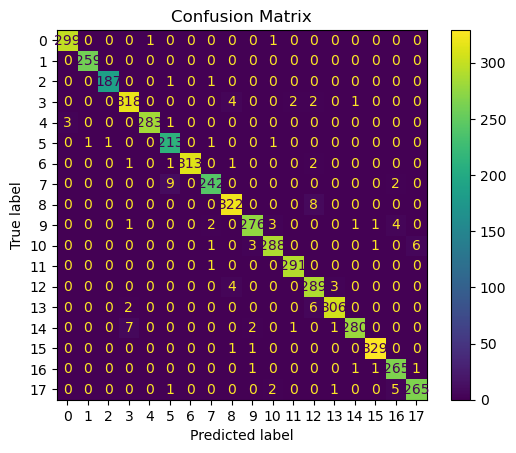

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test_encoded, XGB_pred)
plt.title("Confusion Matrix")
plt.show()

In [23]:
XGB.save_model("xgboost_model.model")

c:\Users\Legion\anaconda3\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [12:46:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  self.get_booster().save_model(fname)


In [5]:
import numpy as np
import pandas as pd
import cv2 as cv
import mediapipe.python.solutions.hands as mp_hands
import mediapipe.python.solutions.drawing_utils as drawing
import mediapipe.python.solutions.drawing_styles as drawing_styles
import xgboost as xgb
from collections import deque

# Load XGBoost model
model = xgb.Booster()
model.load_model("xgboost_model.model")

# Define hand sign classes
hand_sign_classes = [
    "call", "dislike", "fist", "four", "like", "mute", "ok", "one", "palm",
    "peace", "peace inv.", "rock", "stop", "stop inv.", "three", "three 2", 
    "two up", "two up inv."
]

# Feature names - now only using x and y coordinates (42 features instead of 63)
feature_names = [f"f{i}" for i in range(42)]  # 21 landmarks * 2 (x, y)

# Initialize Mediapipe Hands
hands = mp_hands.Hands(
    static_image_mode=False,
    max_num_hands=1,
    min_detection_confidence=0.5
)

# Set camera resolution
width, height = 1280, 720
cam = cv.VideoCapture(0)
cam.set(3, width)
cam.set(4, height)

# Create a named window and set to full screen
cv.namedWindow("Hand Sign Recognition", cv.WINDOW_NORMAL)
cv.setWindowProperty("Hand Sign Recognition", cv.WND_PROP_FULLSCREEN, cv.WINDOW_FULLSCREEN)

# Stabilization window for smoother predictions
prediction_window = deque(maxlen=5)

# Video capture loop
while cam.isOpened():
    success, img = cam.read()
    if not success:
        print("Camera Frame not available")
        continue

    # Convert image to RGB for Mediapipe
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    hands_detected = hands.process(img_rgb)

    # Convert back to BGR for OpenCV display
    img_rgb = cv.cvtColor(img_rgb, cv.COLOR_RGB2BGR)

    # Default hand sign message when no hands are detected
    hand_sign = "No hand detected"

    # If hands are detected
    if hands_detected.multi_hand_landmarks:
        for hand_landmarks in hands_detected.multi_hand_landmarks:
            # Draw hand landmarks
            drawing.draw_landmarks(
                img_rgb,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                drawing_styles.get_default_hand_landmarks_style(),
                drawing_styles.get_default_hand_connections_style()
            )

            # Extract only x and y landmarks (ignoring z)
            landmarks = np.array([[lm.x, lm.y] for lm in hand_landmarks.landmark])

            # Normalize landmarks: Recenter to wrist (landmark[0]) and scale by middle finger tip (landmark[12])
            wrist = landmarks[0]
            middle_tip = landmarks[12]
            scale = np.linalg.norm(middle_tip - wrist) if np.linalg.norm(middle_tip - wrist) != 0 else 1
            landmarks = (landmarks - wrist) / scale  # Normalize x, y

            # Flatten landmarks for model input
            landmarks = landmarks.flatten().reshape(1, -1)

            # Convert landmarks to DMatrix
            dmatrix = xgb.DMatrix(landmarks)

            # Predict hand sign
            prediction = model.predict(dmatrix)
            predicted_class = int(prediction[0])
            prediction_window.append(predicted_class)

            # Debug prints
            print("Raw model output:", prediction)
            print("Predicted class:", predicted_class)

            # Use mode of last few predictions for stability
            stabilized_class = max(set(prediction_window), key=prediction_window.count)
            hand_sign = hand_sign_classes[stabilized_class]

    # Show video feed with flipped image
    flipped_img = cv.flip(img_rgb, 1)

    # Display hand sign prediction
    cv.putText(
        flipped_img,
        f"Hand Sign: {hand_sign}",
        (width - 800, 50),
        cv.FONT_HERSHEY_SIMPLEX,
        1,
        (0, 0, 0),
        2,
        cv.LINE_AA
    )

    cv.putText(
        flipped_img,
        "Press Q to quit",
        (50, height - 30),
        cv.FONT_HERSHEY_SIMPLEX,
        1,
        (0, 0, 0),
        2,
        cv.LINE_AA
    )

    # Show the video window in full screen
    cv.imshow("Hand Sign Recognition", flipped_img)

    # Exit on 'q' key
    if cv.waitKey(20) & 0xFF == ord('q'):
        break

# Release resources
cam.release()
cv.destroyAllWindows()

Raw model output: [12.]
Predicted class: 12
Raw model output: [12.]
Predicted class: 12
Raw model output: [6.]
Predicted class: 6
Raw model output: [6.]
Predicted class: 6
Raw model output: [6.]
Predicted class: 6
Raw model output: [6.]
Predicted class: 6
Raw model output: [6.]
Predicted class: 6
Raw model output: [6.]
Predicted class: 6
Raw model output: [2.]
Predicted class: 2
Raw model output: [7.]
Predicted class: 7
Raw model output: [7.]
Predicted class: 7
Raw model output: [7.]
Predicted class: 7
Raw model output: [7.]
Predicted class: 7
Raw model output: [5.]
Predicted class: 5
Raw model output: [5.]
Predicted class: 5
Raw model output: [5.]
Predicted class: 5
Raw model output: [5.]
Predicted class: 5
Raw model output: [7.]
Predicted class: 7
Raw model output: [14.]
Predicted class: 14
Raw model output: [8.]
Predicted class: 8
Raw model output: [8.]
Predicted class: 8
Raw model output: [8.]
Predicted class: 8
Raw model output: [8.]
Predicted class: 8
Raw model output: [8.]
Predi

SVM Model:

In [4]:
import numpy as np
import cv2 as cv
import mediapipe.python.solutions.hands as mp_hands
import mediapipe.python.solutions.drawing_utils as drawing
import mediapipe.python.solutions.drawing_styles as drawing_styles
from sklearn.svm import SVC
import joblib
from collections import deque

# Load SVM model
svm_model = joblib.load("svm_model.joblib")  # Replace with your actual model file

# Define hand sign classes
hand_sign_classes = [
    "call", "dislike", "fist", "four", "like", "mute", "ok", "one", "palm",
    "peace", "peace inv.", "rock", "stop", "stop inv.", "three", "three 2", 
    "two up", "two up inv."
]

# Initialize Mediapipe Hands
hands = mp_hands.Hands(
    static_image_mode=False,
    max_num_hands=1,
    min_detection_confidence=0.5
)

# Set camera resolution
width, height = 1280, 720
cam = cv.VideoCapture(0)
cam.set(3, width)
cam.set(4, height)

# Stabilization window for smoother predictions
prediction_window = deque(maxlen=5)

# Video capture loop
while cam.isOpened():
    success, img = cam.read()
    if not success:
        print("Camera Frame not available")
        continue

    # Convert image to RGB for Mediapipe
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    hands_detected = hands.process(img_rgb)

    # Convert back to BGR for OpenCV display
    img_rgb = cv.cvtColor(img_rgb, cv.COLOR_RGB2BGR)

    # Default hand sign message when no hands are detected
    hand_sign = "No hand detected"

    # If hands are detected
    if hands_detected.multi_hand_landmarks:
        for hand_landmarks in hands_detected.multi_hand_landmarks:
            # Draw hand landmarks
            drawing.draw_landmarks(
                img_rgb,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                drawing_styles.get_default_hand_landmarks_style(),
                drawing_styles.get_default_hand_connections_style()
            )

            # Extract only x and y landmarks (ignoring z)
            landmarks = np.array([[lm.x, lm.y] for lm in hand_landmarks.landmark])

            # Normalize landmarks: Recenter to wrist (landmark[0]) and scale by middle finger tip (landmark[12])
            wrist = landmarks[0]
            middle_tip = landmarks[12]
            scale = np.linalg.norm(middle_tip - wrist) if np.linalg.norm(middle_tip - wrist) != 0 else 1
            landmarks = (landmarks - wrist) / scale  # Normalize x, y

            # Flatten landmarks for model input
            landmarks = landmarks.flatten().reshape(1, -1)

            # Predict hand sign using SVM
            prediction = svm_model.predict(landmarks)
            predicted_class = int(prediction[0])
            prediction_window.append(predicted_class)

            # Debug prints
            print("Predicted class:", predicted_class)

            # Use mode of last few predictions for stability
            if prediction_window:
                stabilized_class = max(set(prediction_window), key=prediction_window.count)
                hand_sign = hand_sign_classes[stabilized_class]

    # Show video feed with flipped image
    flipped_img = cv.flip(img_rgb, 1)

    # Display hand sign prediction
    cv.putText(
        flipped_img,
        f"Hand Sign: {hand_sign}",
        (width - 800, 50),
        cv.FONT_HERSHEY_SIMPLEX,
        1,
        (0, 0, 0),
        2,
        cv.LINE_AA
    )

    cv.putText(
        flipped_img,
        "Press Q to quit",
        (50, height - 30),
        cv.FONT_HERSHEY_SIMPLEX,
        1,
        (0, 0, 0),
        2,
        cv.LINE_AA
    )

    # Show the video window
    cv.imshow("Hand Sign Recognition (SVM)", flipped_img)

    # Exit on 'q' key
    if cv.waitKey(20) & 0xFF == ord('q'):
        break

# Release resources
cam.release()
cv.destroyAllWindows()

c:\Users\Legion\anaconda3\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.6.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


RFC Model:

In [2]:
import numpy as np
import cv2 as cv
import mediapipe.python.solutions.hands as mp_hands
import mediapipe.python.solutions.drawing_utils as drawing
import mediapipe.python.solutions.drawing_styles as drawing_styles
from sklearn.ensemble import RandomForestClassifier
import joblib
from collections import deque

# Load Random Forest model
rfc_model = joblib.load("random_forest_model.joblib")  # Replace with your actual model file

# Define hand sign classes
hand_sign_classes = [
    "call", "dislike", "fist", "four", "like", "mute", "ok", "one", "palm",
    "peace", "peace inv.", "rock", "stop", "stop inv.", "three", "three 2", 
    "two up", "two up inv."
]

# Initialize Mediapipe Hands
hands = mp_hands.Hands(
    static_image_mode=False,
    max_num_hands=1,
    min_detection_confidence=0.5
)

# Set camera resolution
width, height = 1280, 720
cam = cv.VideoCapture(0)
cam.set(3, width)
cam.set(4, height)

# Stabilization window for smoother predictions
prediction_window = deque(maxlen=5)

# Video capture loop
while cam.isOpened():
    success, img = cam.read()
    if not success:
        print("Camera Frame not available")
        continue

    # Convert image to RGB for Mediapipe
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    hands_detected = hands.process(img_rgb)

    # Convert back to BGR for OpenCV display
    img_rgb = cv.cvtColor(img_rgb, cv.COLOR_RGB2BGR)

    # Default hand sign message when no hands are detected
    hand_sign = "No hand detected"

    # If hands are detected
    if hands_detected.multi_hand_landmarks:
        for hand_landmarks in hands_detected.multi_hand_landmarks:
            # Draw hand landmarks
            drawing.draw_landmarks(
                img_rgb,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                drawing_styles.get_default_hand_landmarks_style(),
                drawing_styles.get_default_hand_connections_style()
            )

            # Extract only x and y landmarks (ignoring z)
            landmarks = np.array([[lm.x, lm.y] for lm in hand_landmarks.landmark])

            # Normalize landmarks: Recenter to wrist (landmark[0]) and scale by middle finger tip (landmark[12])
            wrist = landmarks[0]
            middle_tip = landmarks[12]
            scale = np.linalg.norm(middle_tip - wrist) if np.linalg.norm(middle_tip - wrist) != 0 else 1
            landmarks = (landmarks - wrist) / scale  # Normalize x, y

            # Flatten landmarks for model input
            landmarks = landmarks.flatten().reshape(1, -1)

            # Predict hand sign using Random Forest
            prediction = rfc_model.predict(landmarks)
            predicted_class = int(prediction[0])
            prediction_window.append(predicted_class)

            # Debug prints
            print("Predicted class:", predicted_class)

            # Use mode of last few predictions for stability
            if prediction_window:
                stabilized_class = max(set(prediction_window), key=prediction_window.count)
                hand_sign = hand_sign_classes[stabilized_class]

    # Show video feed with flipped image
    flipped_img = cv.flip(img_rgb, 1)

    # Display hand sign prediction
    cv.putText(
        flipped_img,
        f"Hand Sign: {hand_sign}",
        (width - 800, 50),
        cv.FONT_HERSHEY_SIMPLEX,
        1,
        (0, 0, 0),
        2,
        cv.LINE_AA
    )

    cv.putText(
        flipped_img,
        "Press Q to quit",
        (50, height - 30),
        cv.FONT_HERSHEY_SIMPLEX,
        1,
        (0, 0, 0),
        2,
        cv.LINE_AA
    )

    # Show the video window
    cv.imshow("Hand Sign Recognition (Random Forest)", flipped_img)

    # Exit on 'q' key
    if cv.waitKey(20) & 0xFF == ord('q'):
        break

# Release resources
cam.release()
cv.destroyAllWindows()

c:\Users\Legion\anaconda3\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.6.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\Legion\anaconda3\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.6.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Predicted class: 3
Predicted class: 3
Predicted class: 12
Predicted class: 3
Predicted class: 12
Predicted class: 3
Predicted class: 3
Predicted class: 3
Predicted class: 3
Predicted class: 3
Predicted class: 3
Predicted class: 3
Predicted class: 3
Predicted class: 3
Predicted class: 3
Predicted class: 3
Predicted class: 3
Predicted class: 3
Predicted class: 3
Predicted class: 3
Predicted class: 3
Predicted class: 3
Predicted class: 3
Predicted class: 3
Predicted class: 3
Predicted class: 3
Predicted class: 3
Predicted class: 3
Predicted class: 3
Predicted class: 3
Predicted class: 3
Predicted class: 6
Predicted class: 6
Predicted class: 6
Predicted class: 6
Predicted class: 6
Predicted class: 6
Predicted class: 6
Predicted class: 6
Predicted class: 6
Predicted class: 6
Predicted class: 6
Predicted class: 6
Predicted class: 6
Predicted class: 6
Predicted class: 6
Predicted class: 6
Predicted class: 6
Predicted class: 6
Predicted class: 6
Predicted class: 6
Predicted class: 6
Predicted 